# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].unique()
number_of_mice = len(mouse_df["Mouse ID"].unique())
print(f"There are {number_of_mice} mice.")

There are 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"], keep="first")]
duplicate["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_df.loc[mouse_df["Mouse ID"] == "g989"]
duplicate_data.index

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop(labels=duplicate_data.index, axis=0, inplace=False)
clean_mouse_df.reset_index(drop=True)
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].unique()
number_of_mice = len(clean_mouse_df["Mouse ID"].unique())
print(f"There are {number_of_mice} mice.")

There are 248 mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_volume = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stdev = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.concat([mean_tumor_volume, median_tumor_volume, variance_tumor_volume, tumor_stdev, tumor_SEM], axis=1)
summary_df.columns = ["Average Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summary_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
stats_table = clean_mouse_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "150%"), ("color", 'black')])]
stats_table = stats_table.style.set_caption("Tumor Volume (mm3)").set_table_styles(styles)
stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

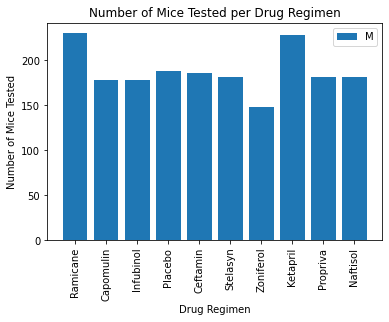

In [33]:
#Testing how to add legend
x1 = clean_mouse_df["Drug Regimen"].unique()
y1 = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
labels = "Mice"

plt.bar(x1, y1)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.legend(labels)
plt.show()

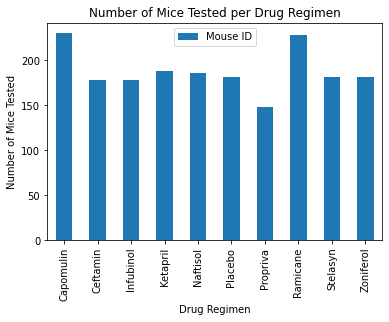

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar0 = pd.concat([clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]], axis=1)
bar0.plot(kind='bar', title="Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


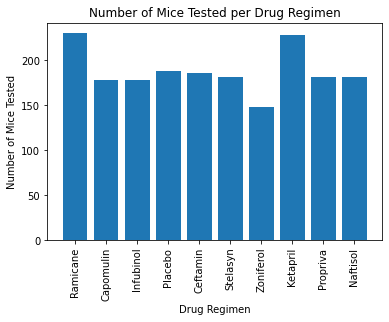

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x1 = clean_mouse_df["Drug Regimen"].unique()
y1 = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar1 = plt.bar(x1, y1)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()


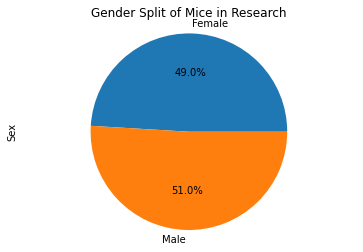

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie0 = clean_mouse_df.groupby("Sex").count()["Mouse ID"]
pie0.plot(kind='pie', y="Sex", autopct="%1.1f%%", title="Gender Split of Mice in Research")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


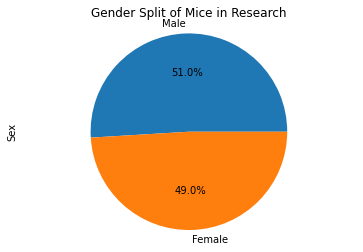

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie0 = clean_mouse_df.groupby("Sex").count()["Mouse ID"]
labels = ["Male", "Female"]
sizes = [pie0["Male"], pie0["Female"]]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Gender Split of Mice in Research")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


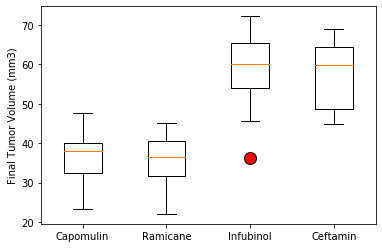

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

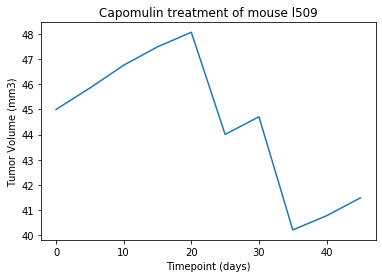

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



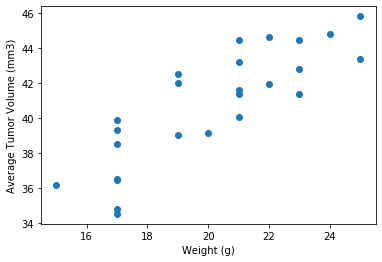

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


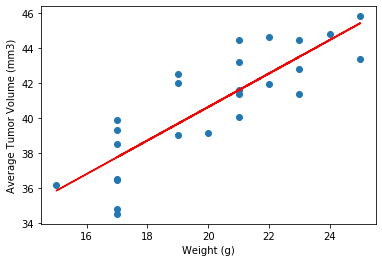

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

